In [7]:
from __future__ import print_function, unicode_literals

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Основы NumPy

**N. Все упражнения ниже нужно делать без использования циклов**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [17]:
my_vec = np.arange(1, 21)
print((2**my_vec)/my_vec)

[  2.00000000e+00   2.00000000e+00   2.67000000e+00   4.00000000e+00
   6.40000000e+00   1.06700000e+01   1.82900000e+01   3.20000000e+01
   5.68900000e+01   1.02400000e+02   1.86180000e+02   3.41330000e+02
   6.30150000e+02   1.17029000e+03   2.18453000e+03   4.09600000e+03
   7.71012000e+03   1.45635600e+04   2.75941100e+04   5.24288000e+04]


**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [23]:
sum([0.1**(3*i)*0.2**(4*i) for i in range(0, 6)])

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [51]:
my_matr = np.zeros((8, 8))
my_matr[::2, ::2] = 1
my_matr[1::2, 1::2] = 1
my_matr.astype(int)

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [79]:
X = np.random.random((5, 2))
print(X)
vec1 = [np.sqrt((X[i, 1]**2 + X[i, 0]**2)) for i in range(0, 5)]
vec2 = [np.arctan2(X[i, 1], X[i, 0]) for i in range(0, 5)]
X_pol = np.vstack((vec1, vec2))
print('В полярных координатах (модуль, аргумент):')
print(X_pol.transpose())

[[ 0.15759431  0.12162214]
 [ 0.60454695  0.47675601]
 [ 0.99454809  0.55887811]
 [ 0.14544212  0.29878015]
 [ 0.88067794  0.45182833]]
В полярных координатах (модуль, аргумент):
[[ 0.19906761  0.65727135]
 [ 0.76991773  0.66776145]
 [ 1.14082016  0.5119653 ]
 [ 0.33229954  1.11777536]
 [ 0.98981942  0.47402989]]


**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [103]:
X = np.random.random((10, 10))
scal = np.argmax(X)
x1 = scal // 10
x2 = scal % 10
print(x1, x2)

8 7


**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

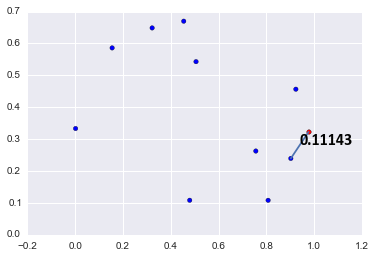

In [3]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))
color = ['blue' for i in range(10)]
plt.scatter(y[:, 0], y[:, 1], c = 'red')
lengths = [np.sqrt((X[i, 0] - y[0, 0])**2 + (X[i, 1] - y[0, 1])**2) for i in range(10)]
closest = np.argmin(lengths)
plt.scatter(X[:, 0], X[:, 1], c = color)
points = np.vstack((y[0, :], X[closest, :]))
plt.plot(points[:, 0], points[:, 1])
mean = np.mean(points, 0)
font = {'family' : 'calibri',
        'color' : 'black',
        'weight' : 'bold',
        'size' : 16}
plt.text(mean[0], mean[1], np.round(lengths[closest], 5), fontdict=font)
plt.show()

**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте ёё график на промежутке $-3<x < 3$.

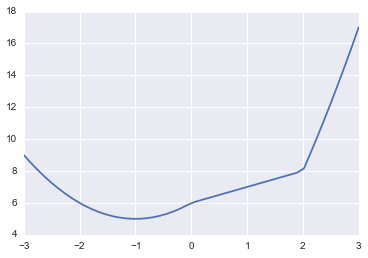

In [231]:
def function(x):
    if x < 0:
        return x**2 + 2*x + 6
    elif x <= 2:
        return x + 6
    else:
        return x**2 + 4*x - 4
X = np.linspace(-3, 3, 50)
y = [function(x) for x in X]
plt.plot(X, y)
plt.show()

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [260]:
X = np.random.random((10, 10))
# print(X)
X = X - np.mean(X, 1).reshape(-1, 1)
print(X)
print(np.round(np.mean(X, 1), 10))

[[-0.31843381 -0.52951635  0.01620254  0.07320136  0.27925729 -0.41261509
   0.28325248  0.23669107  0.11585058  0.25610992]
 [ 0.081845    0.44961118 -0.43348929 -0.2806216   0.39663667  0.39643407
  -0.35362304 -0.10501718 -0.09909952 -0.0526763 ]
 [-0.15038906 -0.00499746  0.22929391 -0.17202585 -0.25753813  0.26325062
   0.02591957 -0.3808479   0.51694409 -0.06960979]
 [ 0.26175843 -0.30712155 -0.32803441  0.45043424 -0.33309034 -0.24022279
   0.23548521  0.25061594 -0.12813183  0.13830709]
 [-0.23883553 -0.61828196 -0.16123983  0.27429223  0.20049095 -0.28894735
   0.26606668  0.02382956  0.27578733  0.26683792]
 [-0.0480165  -0.41311507  0.37461657  0.23815751 -0.1970946   0.14065129
   0.07595718 -0.07724123 -0.37409804  0.28018288]
 [-0.11379678 -0.31943627  0.11514427 -0.39889564  0.43976846  0.56691529
  -0.36582813  0.48100988 -0.23419439 -0.17068668]
 [ 0.21923234 -0.33549094  0.18118625 -0.40023087  0.04744533 -0.20730791
   0.34254009  0.49671947 -0.41154916  0.06745541]


**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [270]:
X = np.random.normal(loc=5, scale=2., size=1000)
print('Выборочое среднее: ', np.mean(X))
print('Выборочная дисперсия: ', np.sqrt(np.var(X)))

Выборочое среднее:  4.98529068968
Выборочная дисперсия:  2.03719574292


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [350]:
my_matr = np.zeros((5, 5))
np.vstack([np.hstack((np.array(range(i, 5)), np.array(range(0, i)))) for i in range(5)])

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 1.,  2.,  3.,  4.,  0.],
       [ 2.,  3.,  4.,  0.,  1.],
       [ 3.,  4.,  0.,  1.,  2.],
       [ 4.,  0.,  1.,  2.,  3.]])

## 2. Python

**1.** Есть следующее реккурентное соотношение:
$$ x_i = 108 - \frac{815-\frac{1500}{x_{i-2}}}{x_{i-1}} $$
Напишите функцию
    
    foo(x_1, x_0, n)
    
которая вычисляет $x_n$ в зависимости от $x_0$ и $x_1$. 

Затем вычислите:

In [39]:
from fractions import Fraction
from decimal import Decimal

def foo(x_1, x_0, n):
    if n < 0:
        raise IndexError
    elif n == 0:
        return x_0
    elif n == 1:
        return x_1
    else:         
        return 108 - (815 - 1500/foo(x_1, x_0, n - 2))/foo(x_1, x_0, n - 1)

v1 = foo(4.25, 4, 15)
v2 = float(foo(Fraction(17, 4), Fraction(4), 15))
v3 = float(foo(Decimal('4.25'), Decimal('4'), 15))

print(v1, v2, v3)

168.93916767106458 4.999060071970894 4.999060068778541


Из-за чего такая разница? Какой правильный ответ?

*Так как компьютер очевидно не может хранить бесконечное число цифр после запятой, то при вычислениях с бесконечными дробями всегда будут появляться ошибки. При хранении во float, некоторые дроби, являющиеся конечными в десятичной системе иcчисления, будут переведены в бесконечные в двоичной. При использовании Decimal, бесконечными будут оставаться только понятные человеку дроби, то есть дроби бесконечные в десятичной системе счисления. Так как Fraction работает с рациональными числами а в рекурсивном соотношении нет операций, выводящих за рамки рациональных чисел, то до тех пор, пока на вход будут подаваться рациональные числа v2 должна давать правильный ответ. Но следующие результаты заставляют усомниться в корректности работы fractions.*

In [44]:
Fraction(5/3) == 1/Fraction(3/5)

False

In [53]:
Fraction(3/9), Fraction(4, 10)


(Fraction(6004799503160661, 18014398509481984), Fraction(2, 5))

**2.** Имеется класс:

In [122]:
class List(object):
    def __init__(self, el, nxt=None):
        self.nxt = nxt
        self.el = el
        
    def __repr__(self):
        if self.nxt:
            return 'List(%s, %s)' % (self.el, repr(self.nxt))
        return 'List(%s)' % self.el
    
lst = List(1, List(2, List(3, List(4, List(5)))))
print(inverse(lst))

List(5, List(4, List(3, List(2, List(1)))))


Нужно написать функцию

Которая переворачивает список без создания новых вершин.

In [117]:
def last_(lst):    
    prelast = None
    last = lst
    while last.nxt:
        prelast = last
        last = last.nxt
    return prelast, last

In [121]:
def inverse(lst):
    pre_last, new_list = last_(lst)
    while pre_last:        
        last_(new_list)[1].nxt = pre_last                
        pre_last.nxt = None
        pre_last = last_(lst)[0]
    return new_list
        

**3.** Есть класс, который представляет книгу. У книги имеется рейтинг и связи "похожести" с другими книгами. Отношение "похожести" симметрично.

In [22]:
from collections import defaultdict

In [47]:
class Book(object):
    def __init__(self, book_id, book_rating):
        self.book_id = book_id
        self.book_rating = book_rating
        self.similar_books = []
    
    def append_similar_book(self, other):
        self.similar_books.append(other)
        other.similar_books.append(self)    
    
    
def get_most_popular_books(book, num):    
    
    def add_to_tops(top_list, book):
        for i in range(len(top_list)):
            if book.book_rating > top_list[i].book_rating:
                top_list.pop()
                top_list.insert(i, book)
                break
                
    marked_books = defaultdict(lambda : False)
    top_books = [book]*num
    stack_list = [book]
    while stack_list:
        cur_book = stack_list.pop()
        add_to_tops(top_books, cur_book)
        marked_books[cur_book.book_id] = True
        for book in cur_book.similar_books:
            if not marked_books[book.book_id]:
                stack_list.append(book)
    return top_books             


In [46]:
b1, b2, b3, b4 = Book(1, 1.1), Book(2, 1.4), Book(3, 4.0), Book(4, 5.0)

b1.append_similar_book(b2)
b2.append_similar_book(b4)
b1.append_similar_book(b3)
b3.append_similar_book(b4)

Нужно реализовать 

     get_most_popular_books() 
     
максимально оптимальным образом и, конечно, попробовать оценить сложность алгоритма. Функция принимает два параметра - книгу и число книг с максимальным рейтингом, которые нужно отыскать во всей подсети "похожести" данной книги.  Иными словами - нужно обойти граф, и вернуть *num* книг с наибольшим рейтингом.

Например:

    get_most_popular_books(b1, 1) == [b4]
    
    get_most_popular_books(b1, 2) == [b4, b3]
    

In [45]:
['b{}'.format(book.book_id) for book in get_most_popular_books(b1, 2)]

['b4', 'b3']

**4.** Бинарное дерево задано следующим образом:

In [1]:
class Tree(object):
    def __init__(self, val, left=None, right=None):
        self.value = val
        self.left = left
        self.right = right

Известно, что все значения (value) в дереве различны. 

Необходимо реализовать функцию 

    find_fca(tree, val1, val2)
    
которая ищет первого общего предка двух вершин с идентификаторами 
    val1
и 
    val2 
. Иными словами, необходимо реализовать функцию, которая ищет наиеньшее поддерево (в плане числа вершин), которое содержит вершины с указанными идентификаторами. 
    val1 
или 
    val2 
необязательно должны присутствовать в дереве, в таком случае нужно вернуть 
    None
 . Пример
 
    tree = Tree(5, Tree(3, Tree(2), Tree(1)), Tree(7))
    find_fca(a, 2, 7) == 5
    find_fca(a, 2, 1) == 3
    find_fca(a, 3, 1) == 3

In [57]:
tree = Tree(5, Tree(3, Tree(2), Tree(1)), Tree(7))
print(find_fca(tree, 2, 7) == 5)
print(find_fca(tree, 2, 1) == 3)
print(find_fca(tree, 3, 1) == 3)
print(find_fca(tree, 3, 1, 2) == 3)
print(find_fca(tree, 3, 1, 8) == None)
print(find_fca(tree, 1, 1) == 1)

True
True
True
True
True
True


In [46]:
from collections import defaultdict

def find_fca(tree, *to_find):
    to_find_set = set(to_find)
    n = len(to_find_set)
    stack = [tree]
    visited = []    
    parents_dict = defaultdict(lambda : 0)
    while stack:
        cur = stack[-1]        
        # mark lineage of the found value
        if cur.value in to_find_set:
            to_find_set.remove(cur.value)
            for node in reversed(stack):
                parents_dict[node.value] += 1
                if parents_dict[node.value] == n:
                    return node.value
         
        if cur.left != None and not cur.left.value in visited:
            stack.append(cur.left)
        elif cur.right != None and not cur.right.value in visited:
            stack.append(cur.right)
        else:
            visited.append(cur.value)
            stack.pop()    
    return None

## 3. SciPy


В SciPy есть базовые функции для обработки изображений (для более продвинутых задач стоит использовать [skimage](http://scikit-image.org) или [OpenCV](http://opencv.org) ). Загрузим цветное изображение размером (360, 480) в массив и отобразим его: 

In [2]:
from scipy import misc
image = misc.imread('data/man.png')
plt.imshow(image)

NameError: name 'plt' is not defined

In [3]:
image.shape

(360, 480, 3)

Как  вижно **image** это трехмерный массив, где первые две оси координаты пикселя, третья - его цвет в виде (R,G,B). Например, цвет пиксела с координатами (5, 5):

In [10]:
image[5, 5]

array([215, 114,   0], dtype=uint8)

Обнулим G, B составляющие, и посмотрим что получится:

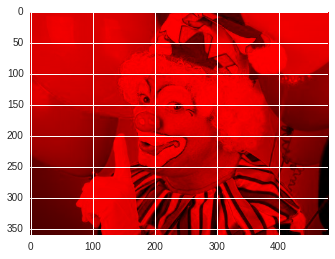

In [11]:
image[:, :, 1:] = 0.
plt.imshow(image)

С RGB работать неудобно, так что при работе и изображениями часто используют оттенки серого (grayscale). В таком случае изображение представляется в виде двумерной матрицы, где каждой элемент кодирует интенсивность соответствующего пиксела. Загрузим клоуна в grayscale:

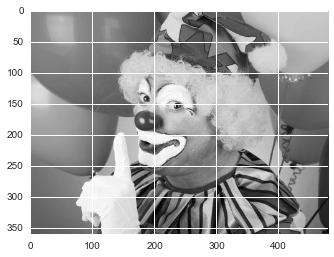

In [4]:
image = sp.misc.imread('data/man.png', flatten=True)
plt.imshow(image, cmap=plt.cm.gray)

In [5]:
image.shape

(360, 480)

Как видно **plt.imshow()** понимает в каком виде изображение и отображает его соответствующим образом (cmap - это color map, задает правило отображения числа, то есть элемента матрицы, на цвет).

Задача: загрузить изображение в матрицу (grayscale), применить к матрице [сингулярное разложение (SVD)](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5). Затем, [воспользовавшись замечательным свойством сингулярного разложения](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5#.D0.9F.D1.80.D0.B8.D0.B1.D0.BB.D0.B8.D0.B6.D0.B5.D0.BD.D0.B8.D0.B5_.D0.BC.D0.B0.D1.82.D1.80.D0.B8.D1.86.D0.B5.D0.B9_.D0.BC.D0.B5.D0.BD.D1.8C.D1.88.D0.B5.D0.B3.D0.BE_.D1.80.D0.B0.D0.BD.D0.B3.D0.B0) посчитать и отобразить матрицы, имеющие ранг 5, 10, 100 и 200. Сделать выводы.

Для подсчета SVD можно использовать функцию [np.linalg.svd()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

In [71]:
my_list = np.array(range(9))
print(my_list)
my_list = my_list.reshape((3, 3))
np.fill_diagonal(my_list, np.array([1, 2, 3]))
my_list

[0 1 2 3 4 5 6 7 8]


array([[1, 1, 2],
       [3, 2, 5],
       [6, 7, 3]])

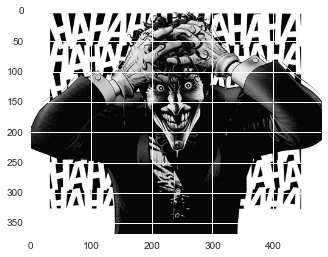

In [3]:
n = 670 # precision
image = sp.misc.imread('data/joker.jpg', flatten=True)
# plt.imshow(image, cmap=plt.cm.gray)
left_matr, sigma, right_matr = np.linalg.svd(image)
list_ind = [1, 2, 3, 4]
my_ind_list = [item[0] for item in sorted(enumerate(sigma), key=lambda x: x[1])]
sigma[my_ind_list[:-n]] = 0
new_sigma = np.array(np.zeros((len(left_matr), len(right_matr))))
np.fill_diagonal(new_sigma, sigma)
# np.diag(sigma).shape
new_image = (left_matr.dot(new_sigma)).dot(right_matr)
plt.imshow(new_image, cmap=plt.cm.gray)

**Вывод**: приближая матрицу изображения с помощью сингулярного разложения получаем изображение, искажения которого зависят от ранга приближающей матрицы

## 4. Работа с HTML

**N: становите библиотеки requests и lxml**

**1.** Часто возникает задача извлечь какую-то полезную информацию с web-страницы, для этого есть много различных инструментов, но самое прострое решение - использование адекватного html-парсера и [XPath](https://ru.wikipedia.org/wiki/XPath). Для Python стандарт де-факто это [lxml](http://lxml.de) или более высокоуровневый [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/). Для Java можно использовать что-то вроде [jsoup](http://jsoup.org). Рассмотрим пример:

In [1]:
import lxml.html

html =  """<html>
                <header>
                </header>
                <body>
                    <div class="c1">
                        <a href="http://yandex.ru">Yandex</a>                       
                    </div>
                     <div class="c1">                        
                        <a href="http://google.ru">Google</a>
                    </div>
                    <div class="c2">                        
                        <a href="http://rambler.ru">Rambler</a>
                    </div>
                </body>
           
           </html>
        """  

tree = lxml.html.fromstring(html)
tree.xpath('//div[@class="c1"]//a/text()')

['Yandex', 'Google']

Тут мы нашли все элементы *&lt;div&gt;* у которых аттрибут *сlass* равен *с1*, в соответствующий поддеревьях нашли все элементы *&lt;a&gt;* и извлекли внутренний текст. Ещё примеры:

In [14]:
tree.xpath('//a/@href')

['http://yandex.ru', 'http://google.ru', 'http://rambler.ru']

In [15]:
tree.xpath('//div/a[@href="http://yandex.ru"]/text()')

['Yandex']

In [2]:
import requests

response = requests.get('http://yandex.ru')
#if response.status_code == 200:
html = response.text
tree = lxml.html.fromstring(html)
    
print('Главные федеральные и региональные новости со страницы Яндекса:')    
news_nodes = tree.xpath('//ul[@class="b-news-list"]/li[@class="b-news-list__item"]')
for node in news_nodes:
    print(' '.join(node.xpath('.//text()')))
    
print('\nКурсы доллара, евро и нефти:') 
stocks_node = tree.xpath('//span[@class="inline-stocks__value_inner"]/text()')
for node in stocks_node:
    print(node)

Главные федеральные и региональные новости со страницы Яндекса:
1. Россия назвала  три условия улучшения отношений с Турцией
2. Кремль подтвердил встречу  президента Путина с госсекретарем Керри
3. Сын российского миллиардера  арестован за убийство матери
4. УЕФА отказался переносить  матч «Локомотив»–«Фенербахче»
5. ВГТРК объяснила снятие  с эфира программы Никиты Михалкова
1. Глава ЮНЕСКО поблагодарила РФ  за инициативы по культурному наследию
2. Четверых пешеходов сбила  машина на улице Генерала Симоняка
3. 33-летнему мужчине выкололи  глаз авторучкой в ночном клубе Петербурга
4. Кремль подтвердил  отмену российско-турецкого саммита в Петербурге
5. Неблагодарный пациент оставил  больницу Сестрорецка без кресла-каталки

Курсы доллара, евро и нефти:
70,71
77,85
38,42


Для работы с деревом HTML удобно использовать встроенные в браузер инструменты разработчика, например из Firefox можно открыть инспектор с помощью комбинации клавиш *Ctrl+Shift+C* или через плагин Firebug. Аналогичные возможности есть в Chrome. 

**Задача:**
1. Взять крупный новостной ресурс (например http://fontanka.ru, http://gazeta.ru или http://lenta.ru).
2. Скачать заголовки и время появления всех новостей за неделю.
3. Вывести top10 самых популярных слов в заголовках (использовать [pymorphy2](https://pymorphy2.readthedocs.org/) для лемматизации) 
4. Построить график сколько новостей появилось в определенное время дня - по оси $x$ час [0, 24), по оси $y$ - число новостей.

In [3]:
def get_news_by_date(today):    
    date = '/{2}/{1:02}/{0:02}'.format(today.day, today.month, today.year)
    root_link = 'http://fontanka.ru/fontanka'
    arc_link = root_link + date + '/all.html'
    req = requests.Session()
    response = req.get(arc_link)
    html = response.text    
    tree = lxml.html.fromstring(html)
    elem_list = tree.xpath('//div[@class="calendar-list"]//div[@class="calendar-item"]')
    news_list = [(elem.find('./div[@class="calendar-item-date"]').text,
                  elem.find('./div[@class="calendar-item-title"]/a').text)
                 for elem in elem_list]
    return news_list

In [19]:
import datetime as dt
import re
import pymorphy2
from collections import Counter, defaultdict

morph = pymorphy2.analyzer.MorphAnalyzer()
number_of_days = 30
news_time = defaultdict(lambda : 0)
words = Counter()
news_list = []
today = dt.date.today()
for i in range(number_of_days):
    today -= dt.timedelta(days=1)
    news_list.extend(get_news_by_date(today))
words_pattern = re.compile('\w+', flags=re.IGNORECASE)
for news in news_list:    
    if not news[1].strip() == []:    
        words.update([morph.parse(word)[0].normal_form for word in
                      re.findall(words_pattern, news[1].lower())
                      if not morph.parse(word)[0].tag.POS in
                      ['PREP', 'CONJ', 'PRCL', 'INTJ']])
        news_time[int(news[0][:2])] += 1

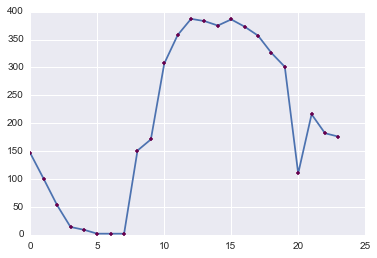

In [20]:
plt.plot(list(news_time.keys()), [item[1] for item in news_time.items()])
plt.plot(list(news_time.keys()), [item[1] for item in news_time.items()], 'b.', color=(0.4, 0, 0.3))
plt.show()

In [21]:
most_common_words = words.most_common(10)

In [22]:
most_common_words

[('петербург', 366),
 ('россия', 294),
 ('турция', 196),
 ('год', 156),
 ('путин', 147),
 ('российский', 138),
 ('быть', 134),
 ('сирия', 129),
 ('задержать', 113),
 ('сми', 112)]

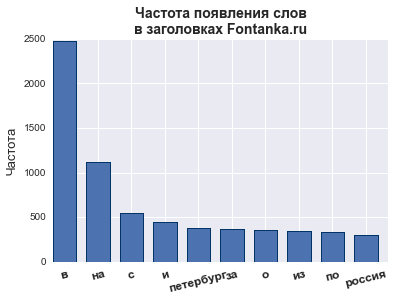

In [53]:
n = 10
width = 0.7
indexes = np.arange(n)
plt.bar(indexes, [word[1] for word in most_common_words], width=width, linewidth=1, edgecolor=(0, 0.2, 0.4))
plt.title('Частота появления слов \nв заголовках Fontanka.ru', size=14, weight='semibold')
plt.xticks(indexes + 0.5 * width, [word[0] for word in most_common_words], size=12, weight='semibold', rotation=14)
plt.ylabel('Частота', size=13)
# plt.savefig('D:/plot.png', dpi=250)

## 5. Графы

**1.** Статьи в Википедии имеют ссылки друг на друга, соответственно их можно представить в виде графа. Рассмотрим некий подграф, который содержит подмножество математических статей. 

В файле *data/wiki_graph.txt*  ориентированный граф, на каждой строчке три разделенных пробелом числа, описывающих ребро:
- id исходящей вершины
- id входящей вершины
- вес ребра (в данном случае всегда 1).

In [46]:
# 10 первых строчек из файла, работает на Windows
!!powershell -command "& {Get-Content 'data/wiki_graph.txt' -TotalCount 10}"

['1 266 1',
 '1 432 1',
 '2 28 1',
 '2 75 1',
 '2 145 1',
 '2 504 1',
 '3 331 1',
 '4 136 1',
 '4 259 1',
 '4 750 1']

In [18]:
# 10 первых строчек из файла, работает на Linux
!!head -n 10 data/wiki_names.txt

['A Mathematical Theory of Communication',
 'APX',
 'Abel equation',
 'Abelian integral',
 'Absolute continuity',
 'Abstract semantic graph',
 'Abstraction model checking',
 'Actuarial science',
 'Adaptive mesh refinement',
 'Adaptive quadrature']

Соответственно первое ребро из вершины 1 в вершину 266, второе из 1 в 432 и т.д.

В файле *data/wiki_names.txt* содержатся имена вершин

Вершина с id равным 1 имеет имя *A Mathematical Theory of Communication*, вершина с id равным  2 называется *APX* и так далее. 
Напишем код для чтения этих данных. Заметим, что использование матрицы смежности, в общем случае, не очень хорошая идея. 

In [4]:
def read_graph(filename):
    max_id = 0
    with open(filename) as f:
        for line in f:
            from_, to_ = (int(x) for x in line.strip().split()[:2])
            max_id = max(max_id, from_, to_)
            
    matrix = np.zeros((max_id, max_id))
    
    with open(filename) as f:
        for line in f:
            from_, to_ = (int(x) for x in line.strip().split()[:2])
            matrix[from_ - 1, to_ - 1] = 1.
            
    return matrix

def read_names(filename):
    with open(filename) as f:
        return [x.strip() for x in f.readlines()]

Граф можно даже отобразить с помощью библиотеки [networkx](https://networkx.github.io/)

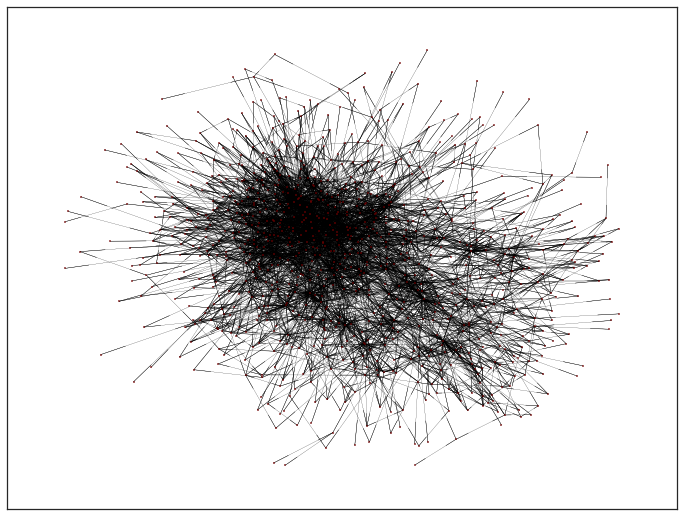

In [5]:
import networkx as nx
adj_matrix = read_graph('data/wiki_graph.txt')
G = nx.to_networkx_graph(adj_matrix, create_using=nx.DiGraph())

with sns.axes_style("white"):
    plt.figure(figsize=(12, 9))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, with_labels=False, node_size=2, width=0.1, pos=nx.spring_layout(G))    

Задача: посчитать для этого графа [PageRank](https://en.wikipedia.org/wiki/PageRank) используя power iteration (метод описан в статье в Wikipedia), найти имя вершины с наибольшим значением. 

In [78]:
def PageRank(adj_matrix):
    loops = 0
    eps = 0.001
    d = 0.85
    N = adj_matrix.shape[0]    
    x = np.ones((N, 1)) / N    
    M = (adj_matrix.transpose() / np.sum(adj_matrix.transpose(), axis=0))    
    M_ = d * M + (1 - d)/ N * np.ones((N, N))    
    x_cur = M.dot(x)    
    while np.linalg.norm(x_cur - x) > eps:
        loops += 1
        x = x_cur
        x_cur = M_.dot(x)    
    return x_cur, loops

In [88]:
most_imp_id = np.argmax(PageRank(adj_matrix)[0])

In [89]:
read_names('data/wiki_names.txt')[most_imp_id]

'Hilbert space'

## 6. Анализ данных

Есть два набора данных:
1. [Определение фальшивых банкнот](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). 
2. [Предсказание поведения доноров крови](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center). 

Нужно взять любой набор из этих данных и проанализировать (построить графики, найти что-нибудь интересное, и т.п.). 

In [112]:
from sklearn import linear_model

In [116]:
with open('data/data_banknote_authentication.txt') as f:
    data_set = [[float(number) for number in line.strip().split(',')] for line in f.readlines()]

np_data_set = np.array(data_set)

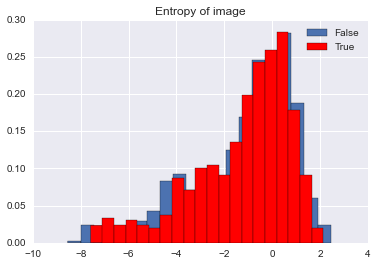

In [139]:
plt.hist(np_data_set[:, 3][np_data_set[:, 4] == 0], bins=20, normed=True)
plt.hist(np_data_set[:, 3][np_data_set[:, 4] == 1], bins=20, color='red', normed=True)
plt.title("Entropy of image")
plt.legend(['False', 'True'])
plt.show()

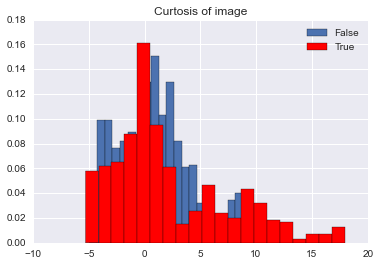

In [143]:
plt.hist(np_data_set[:, 2][np_data_set[:, 4] == 0], bins=20, normed=True)
plt.hist(np_data_set[:, 2][np_data_set[:, 4] == 1], bins=20, color='red', normed=True)
plt.title("Curtosis of image")
plt.legend(['False', 'True'])
plt.show()

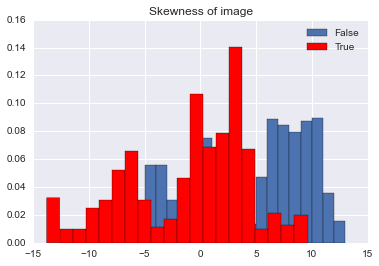

In [144]:
plt.hist(np_data_set[:, 1][np_data_set[:, 4] == 0], bins=20, normed=True)
plt.hist(np_data_set[:, 1][np_data_set[:, 4] == 1], bins=20, color='red', normed=True)
plt.title("Skewness of image")
plt.legend(['False', 'True'])
plt.show()

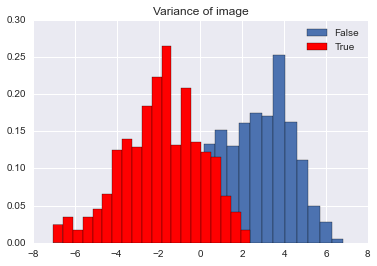

In [145]:
plt.hist(np_data_set[:, 0][np_data_set[:, 4] == 0], bins=20, normed=True)
plt.hist(np_data_set[:, 0][np_data_set[:, 4] == 1], bins=20, color='red', normed=True)
plt.title("Variance of image")
plt.legend(['False', 'True'])
plt.show()

Судя по графикам наибольшее влияние оказывают *дисперсия* и *коэффициент ассиметрии*

#### Классификация с помощью логистической регрессии

In [219]:
import random

indexes = list(range(np_data_set.shape[0]))
random.shuffle(indexes)

train_set = np_data_set[indexes[:400], :]
test_set = np_data_set[indexes[400:], :]
N = test_set.shape[0]

LR = linear_model.LogisticRegression()
LR.fit(train_set[:, [0, 1, 2]], train_set[:, -1])
err = len(np.array(range(N))[LR.predict(test_set[:, [0, 1, 2]]) != test_set[:, -1]])
precision = 1 - err/N
print(precision)

0.9897119341563786
